In [27]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [28]:
from helpers import load_data

# load dataset
x, y = load_data()

In [29]:
len(y)

50

In [36]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

build_k_indices(np.array([1,2,3,4,5,6,7,8,9,10]), 4, 40).shape

(4, 2)

In [45]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    
    tr_index_list = [i for i in range(0,len(k_indices)) if i!=k]
    train_indices = np.concatenate(k_indices[tr_index_list])
    y_test = y[k_indices[k]]
    y_train = y[train_indices]
    x_train = x[train_indices]
    x_test = x[k_indices[k]]
 
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    
    x_tr = build_poly(x_train, degree)
    x_te = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    loss, w_star = ridge_regression(y_train, x_tr, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = loss
    loss_te = np.sqrt(2*compute_mse(y_test, x_te, w_star))
    
    return loss_tr, loss_te

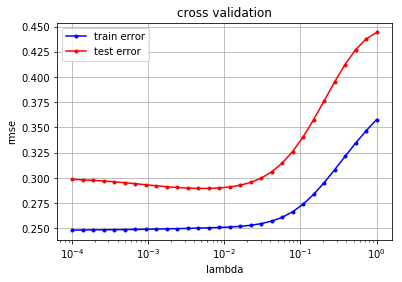

In [46]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        loss_tr = 0
        loss_te = 0
        
        for k in range(k_fold):                
            loss_tr_k, loss_te_k = cross_validation(y, x, k_indices, k, lambda_, degree)
            loss_tr += loss_tr_k
            loss_te += loss_te_k
            
        rmse_tr.append(loss_tr/k_fold)
        rmse_te.append(loss_te/k_fold)
            
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

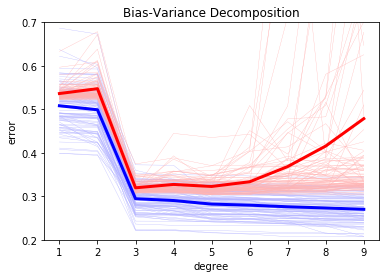

In [52]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        
        for index_degree, degree in enumerate(degrees):
            deg_x = build_poly(x, degree)
            train_x, train_y, test_x, test_y = split_data(deg_x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
            loss, w_star = least_squares(train_y, train_x)
            rmse_tr[index_seed, index_degree] = loss
            rmse_te[index_seed, index_degree] = np.sqrt(2*compute_mse(test_y, test_x, w_star))
            
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()